<a href="https://colab.research.google.com/github/m1key/raspberry-pi/blob/master/humidity/Humidity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
from io import StringIO

TESTDATA = StringIO("""
    2020-03-27 18:00:11,32.00,22.00
    2020-03-28 18:00:11,40.00,22.00
    2020-03-29 18:00:11,39.00,22.00
    2020-03-29 19:20:10,140.00,21.00
    2020-03-29 20:00:11,41.00,22.00
    2020-03-30 01:20:15,20.00,29.00
    2020-04-01 14:10:19,31.00,23.00
    2020-04-02 13:10:19,11.00,23.00
    """)

df = pd.read_csv(TESTDATA, sep=",", names=['datetime', 'humidity', 'temperature'])
df = df[df.humidity < 100]
df = df[df.humidity > 0]

df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')
df = df.groupby(pd.Grouper(freq="24h")).mean()
df = df.reset_index()
df['healthy_min'] = 30
df['healthy_max'] = 50
df

,datetime,humidity,temperature,healthy_min,healthy_max
0,2020-03-27,32.0,22.0,30,50
1,2020-03-28,40.0,22.0,30,50
2,2020-03-29,40.0,22.0,30,50
3,2020-03-30,20.0,29.0,30,50
4,2020-03-31,NaN,NaN,30,50
5,2020-04-01,31.0,23.0,30,50
6,2020-04-02,11.0,23.0,30,50


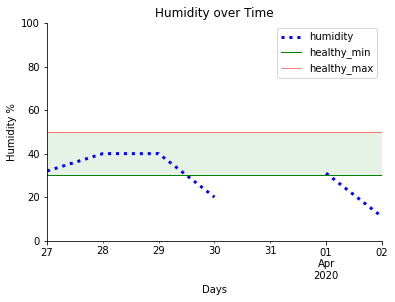

In [75]:
import matplotlib.pyplot as plt

ax = plt.gca()

df.plot(x ='datetime', y='humidity', linestyle='dotted', color="b", linewidth=3, ax=ax)
df.plot(x ='datetime', y='healthy_min', linestyle='solid', color="g", linewidth=1.0, ax=ax)
df.plot(x ='datetime', y='healthy_max', linestyle='solid', color="r", linewidth=0.5, ax=ax)

plt.title('Humidity over Time')
plt.xlabel('Days')
plt.ylabel('Humidity %')
plt.legend()
plt.ylim(0, 100)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.fill_between(df['datetime'].values, df['healthy_min'], df['healthy_max'],
                where=df['healthy_max'] >= df['healthy_min'],
                facecolor='green', alpha=0.1)

plt.show()